# Chạy mô hình dự đoán

## Thư viện

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

## Chạy để xem biểu đồ từ dữ liệu csv

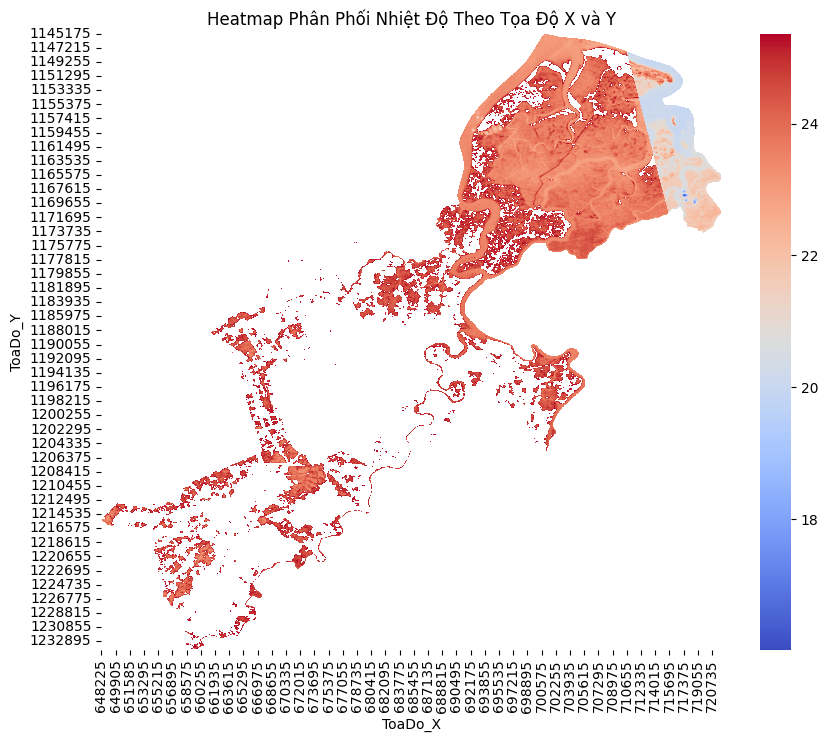

In [4]:
data = pd.read_csv('NhietDo.csv')

plt.figure(figsize=(10, 8))
heatmap_data = data.pivot_table(index='ToaDo_Y', columns='ToaDo_X', values='NhietDo')

sns.heatmap(heatmap_data, cmap='coolwarm', annot=False)

plt.title('Heatmap Phân Phối Nhiệt Độ Theo Tọa Độ X và Y')
plt.xlabel('ToaDo_X')
plt.ylabel('ToaDo_Y')

plt.show()

## Biểu đồ cột

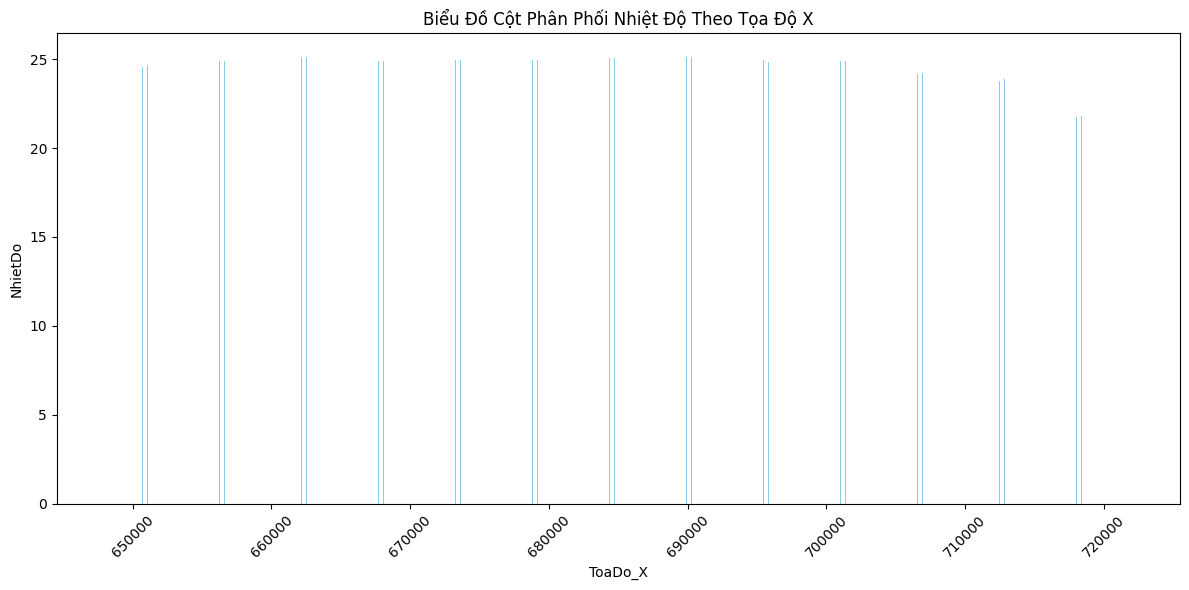

In [5]:
data = pd.read_csv('new_data_with_predictions.csv')

x = data['ToaDo_X'] 
y = data['NhietDo']

plt.figure(figsize=(12, 6))
plt.bar(x, y, color='skyblue')

plt.title('Biểu Đồ Cột Phân Phối Nhiệt Độ Theo Tọa Độ X')
plt.xlabel('ToaDo_X')
plt.ylabel('NhietDo')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Chạy thử nghiệm mô hình

In [3]:
model = tf.keras.models.load_model('temperature_analysis_model.h5')

new_data = pd.read_csv('new_data.csv')  

X_new = new_data[['ToaDo_X', 'ToaDo_Y']]  

original_data = pd.read_csv('NhietDo.csv')  
X_train = original_data[['ToaDo_X', 'ToaDo_Y']]

scaler = MinMaxScaler()
scaler.fit(X_train)  

new_data_scaled = scaler.transform(X_new)
predictions = model.predict(new_data_scaled)

new_data['NhietDo'] = predictions
new_data.to_csv('new_data_with_predictions.csv', index=False)

print('Đang lưu dữ liệu dự đoán vào file new_data_with_predictions.csv...')

min = 0
max = 0
new_data_csv = [];
for i in range(len(predictions)):
    temp = predictions[i][0]
    if temp < min:
        min = temp
    if temp > max:
        max = temp
    new_data_csv.append({'ToaDo_X': new_data["ToaDo_X"][i], 'ToaDo_Y': new_data["ToaDo_Y"][i], 'NhietDo': temp})

print('NhietDo min: ', min)
print('NhietDo max: ', max)

df = pd.DataFrame(new_data_csv)
df.to_csv('new_data_with_predictions.csv', index=False)
print('Kết quả đã được lưu vào new_data_with_predictions.csv')

32768/32768 ━━━━━━━━━━━━━━━━━━━━ 39s 1ms/step
Predictions saved to new_data_with_predictions.csv
